# Seoul Bike Rental

### Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand). 

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


### Attribute Information:

`Date` : year-month-day

`Rented Bike count` - Count of bikes rented at each hour

`Hour` - Hour of the day

`Temperature`-Temperature in Celsius

`Humidity` - %

`Windspeed` - m/s

`Visibility` - 10m

`Dew point temperature` - Celsius

`Solar radiation` - MJ/m2

`Rainfall` - mm

`Snowfall` - cm

`Seasons` - Winter, Spring, Summer, Autumn

`Holiday` - Holiday/No holiday

`Functional Day` - NoFunc(Non Functional Hours), Fun(Functional hours)


## Exploring the Data
Run the code cell below to load necessary Python libraries and load the Bike Rental data. Note that the column from this dataset, `Rented Bike count`, will be our target label (is the count of bikes rented at each hour). All other columns are features about each hour weather database.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv",encoding= 'unicode_escape')

In [3]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
date = df.Date
df = df.drop('Date', axis=1)
df['Date'] = pd.to_datetime(date)
df['Day'] = df.Date.dt.dayofweek

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Rented Bike Count          8760 non-null   int64         
 1   Hour                       8760 non-null   int64         
 2   Temperature(°C)            8760 non-null   float64       
 3   Humidity(%)                8760 non-null   int64         
 4   Wind speed (m/s)           8760 non-null   float64       
 5   Visibility (10m)           8760 non-null   int64         
 6   Dew point temperature(°C)  8760 non-null   float64       
 7   Solar Radiation (MJ/m2)    8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

Renaming the columns for easy Data handling

In [6]:
df = df.rename(columns={'Rented Bike Count': 'Rented_Bike_Count',
                        'Temperature(°C)': 'Temp',
                        'Humidity(%)':'Humidity',
                        'Wind speed (m/s)': 'Wind_speed',
                        'Visibility (10m)': 'Visibility', 
                        'Dew point temperature(°C)': 'DP temp',
                        'Solar Radiation (MJ/m2)': 'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall'})

In [7]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temp', 'Humidity', 'Wind_speed',
       'Visibility', 'DP temp', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning Day', 'Date', 'Day'],
      dtype='object')

In [8]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [9]:
df.isnull().any()

Rented_Bike_Count    False
Hour                 False
Temp                 False
Humidity             False
Wind_speed           False
Visibility           False
DP temp              False
Solar_Radiation      False
Rainfall             False
Snowfall             False
Seasons              False
Holiday              False
Functioning Day      False
Date                 False
Day                  False
dtype: bool

In [10]:
sum(df.duplicated())

0

From the above calles we can see that there is no duplicated or null value in the Dataframe

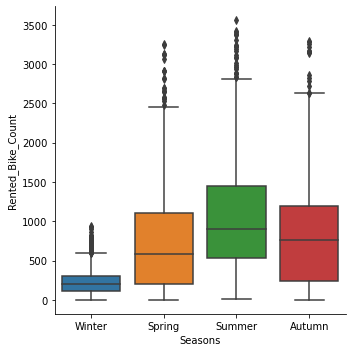

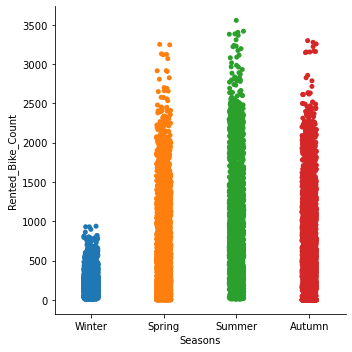

In [11]:
# Season and number of reanted Bike
sns.catplot(x="Seasons", y='Rented_Bike_Count', kind="box", data=df );
sns.catplot(x="Seasons", y='Rented_Bike_Count', data=df);


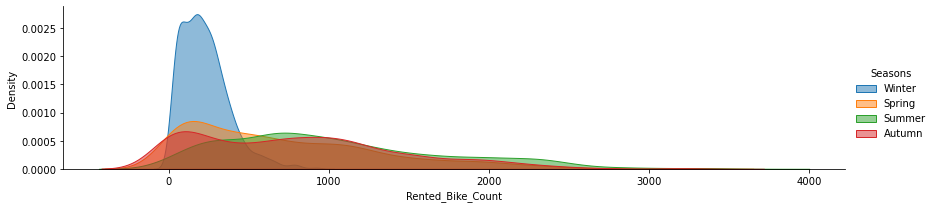

In [12]:
fig = sns.FacetGrid(df, hue='Seasons', aspect=4);
fig.map(sns.kdeplot, 'Rented_Bike_Count',fill=True, alpha=.5, linewidth=1);

fig.add_legend();

##### If there is a season the bikes are rented more than others?
The most rented season are Summer then Spring and the lest season for bike rentel is Winter

In [13]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [14]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [15]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [16]:

df.Holiday = df.Holiday.apply(lambda x: 1 if x == 'Holiday' else 0)
df['Functioning Day'] = df['Functioning Day'].apply(lambda x: 0 if x == 'No' else 1)
dicts={
    'Spring':1,
    'Summer':2,
    'Autumn':3,
    'Winter':4}
seasons=[]
for i in df.Seasons:
    seasons.append(dicts.get(i))
df.Seasons=seasons

In the above cell we are changing the Holiday rather being Holiday and No Holiday to be 1 and 0, Functioning Day rather yes and no to be 1 and 0 , and for the Seasons to be 1 for Spring, 2 for Summer, 3 for Autumn, and 4 for Winter.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rented_Bike_Count  8760 non-null   int64         
 1   Hour               8760 non-null   int64         
 2   Temp               8760 non-null   float64       
 3   Humidity           8760 non-null   int64         
 4   Wind_speed         8760 non-null   float64       
 5   Visibility         8760 non-null   int64         
 6   DP temp            8760 non-null   float64       
 7   Solar_Radiation    8760 non-null   float64       
 8   Rainfall           8760 non-null   float64       
 9   Snowfall           8760 non-null   float64       
 10  Seasons            8760 non-null   int64         
 11  Holiday            8760 non-null   int64         
 12  Functioning Day    8760 non-null   int64         
 13  Date               8760 non-null   datetime64[ns]
 14  Day     

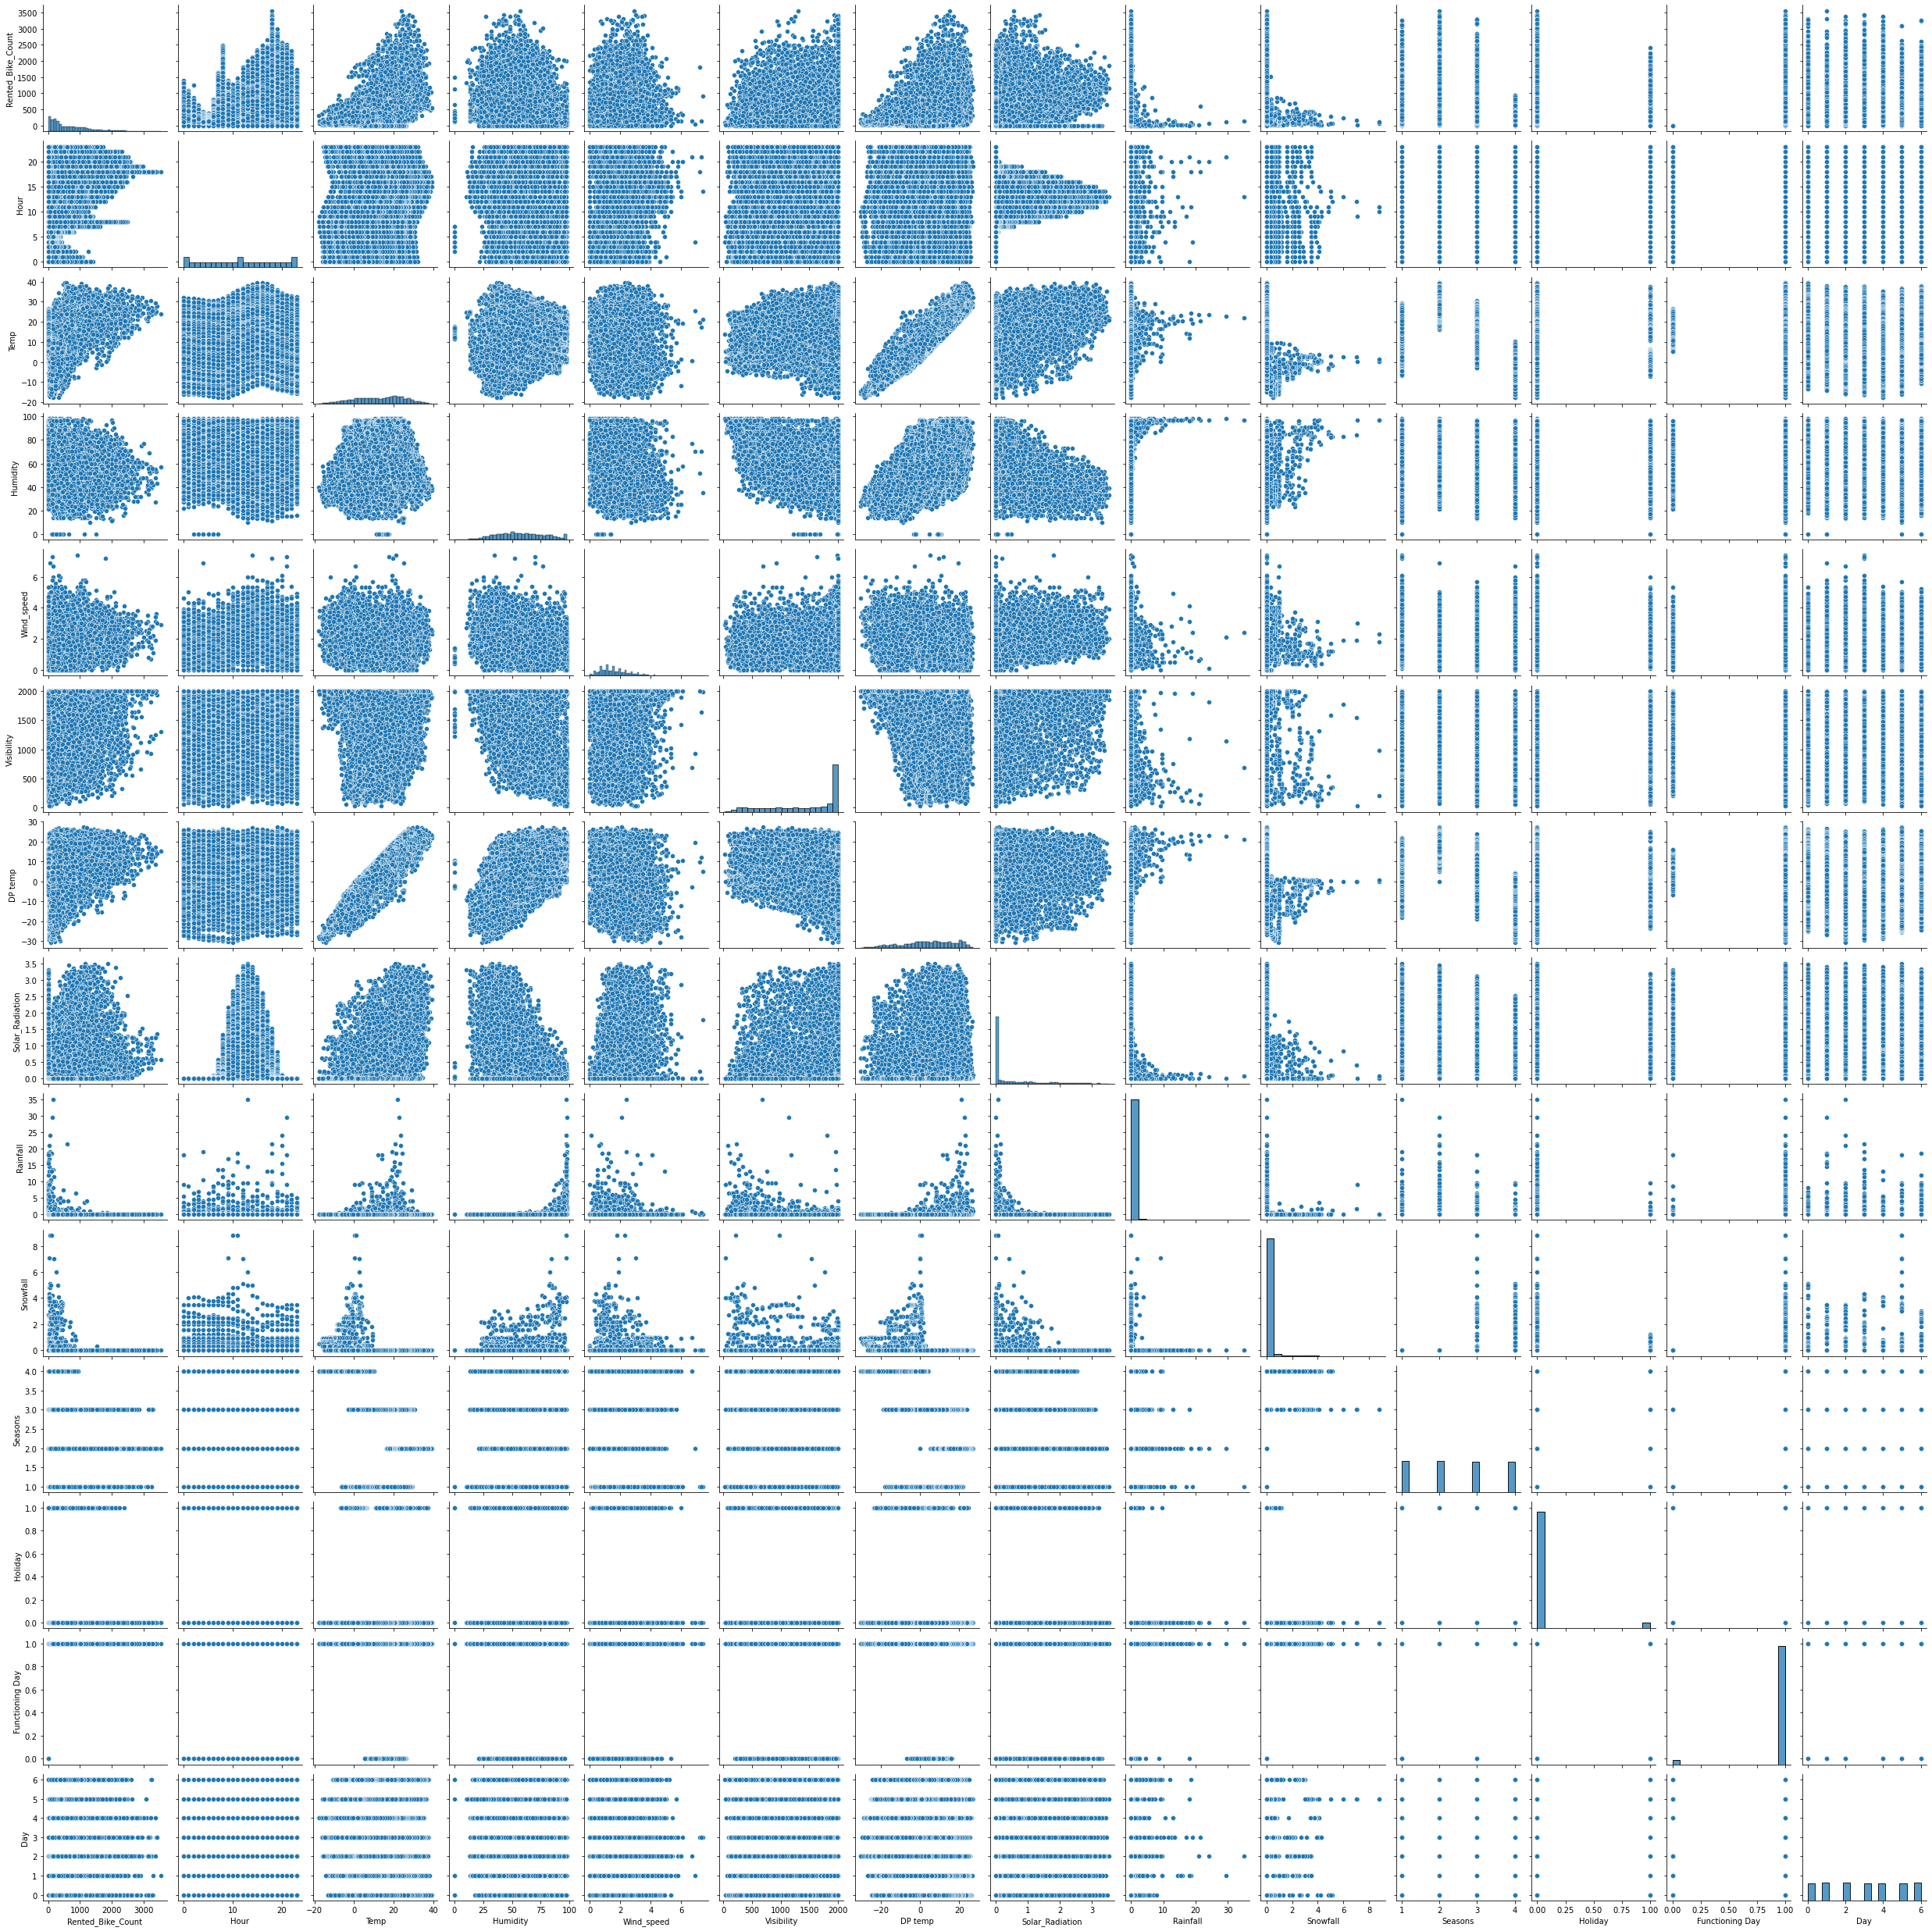

In [18]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df);

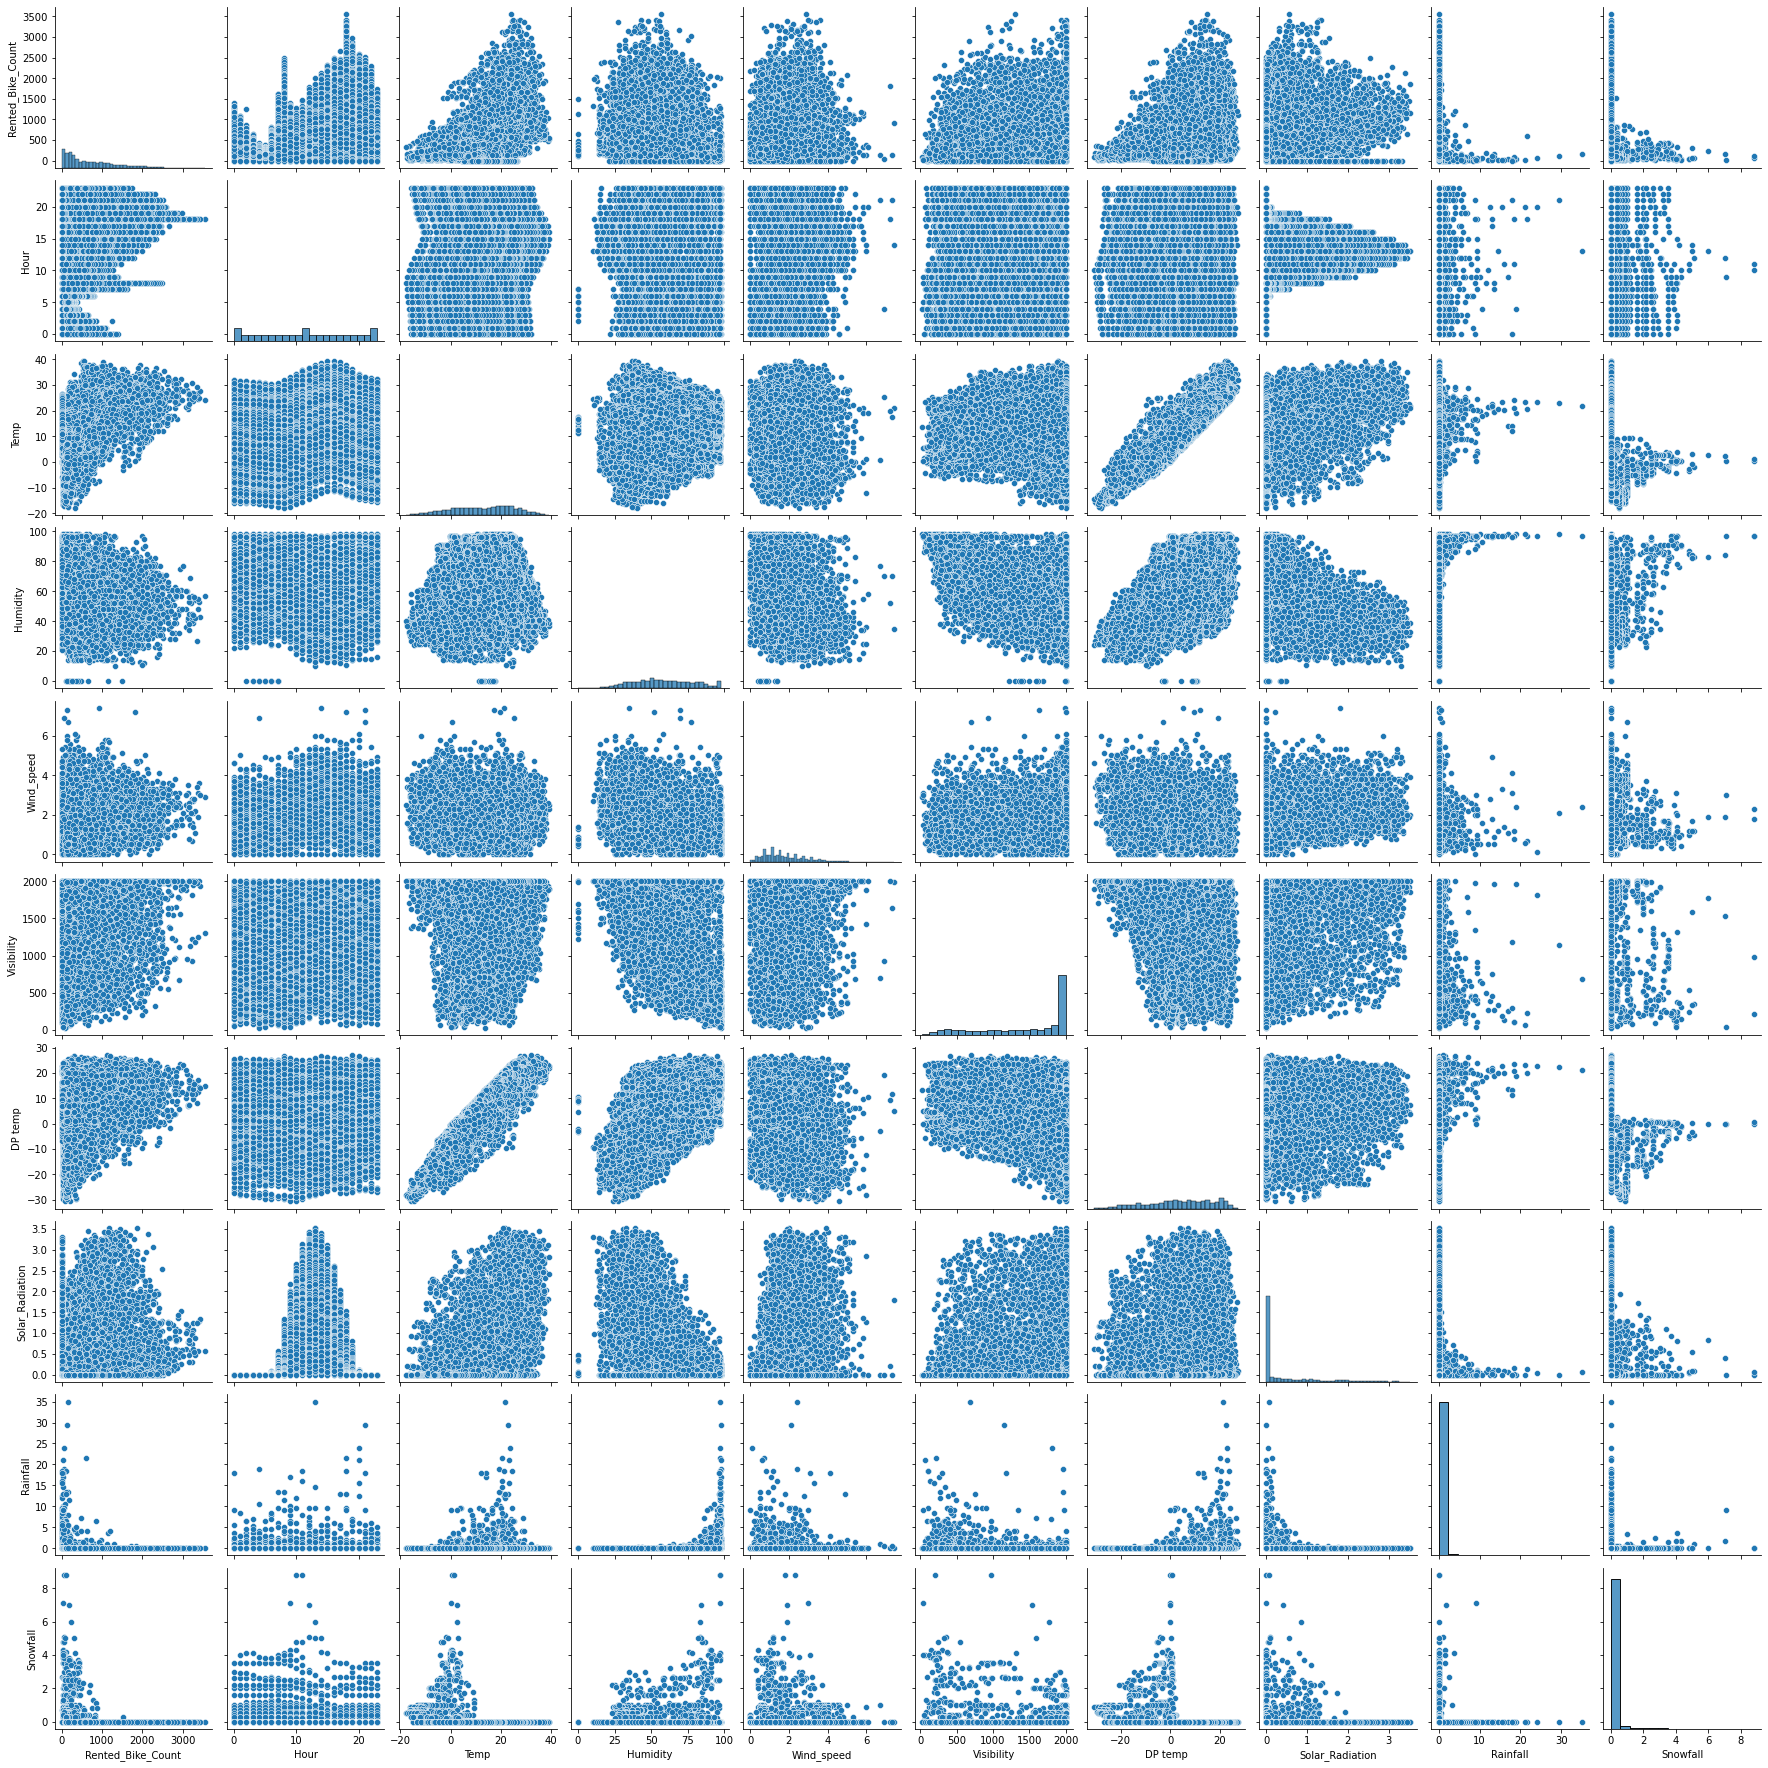

In [19]:
# Plot relations as scatterplots
sns.pairplot(df.drop(['Seasons','Holiday','Functioning Day','Date','Day'], axis=1), height = 2.5, aspect = 1);

In [20]:
color = sns.color_palette()[9]

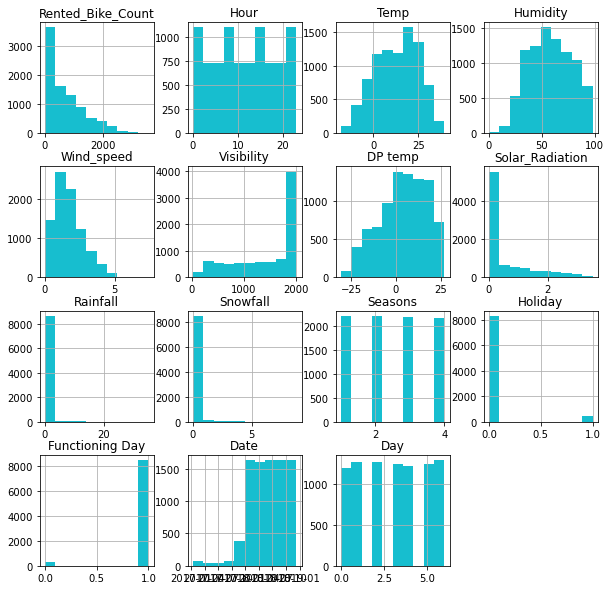

In [21]:
df.hist(figsize=(10,10),color=color);

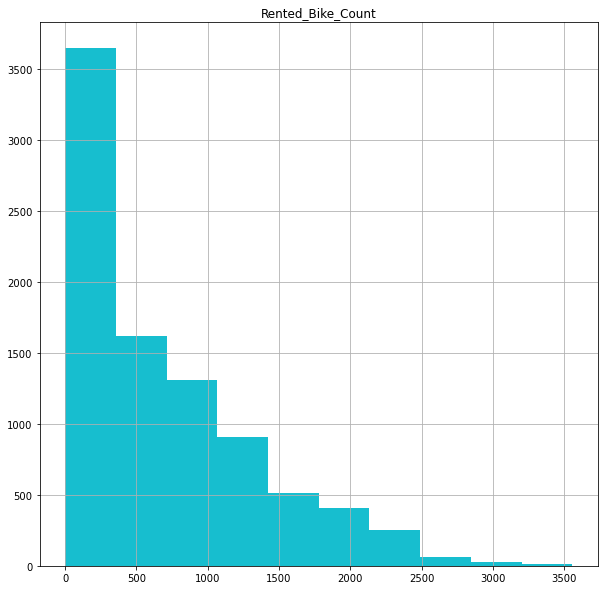

In [22]:
df.hist('Rented_Bike_Count',color=color,figsize=(10,10));

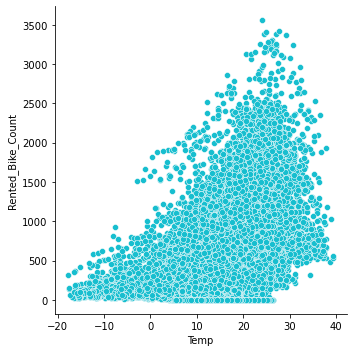

In [23]:
# Scatter plot bikes rented by temperature. 
sns.relplot(data = df,x='Temp',y='Rented_Bike_Count',color=color);

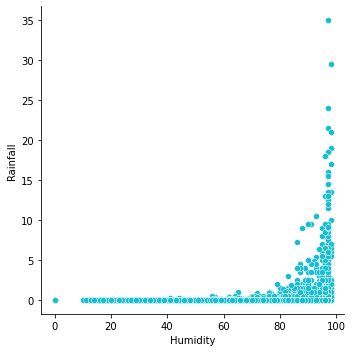

In [24]:
# Rainfall & Humidity 
sns.relplot(data=df, x='Humidity', y='Rainfall',color=color);

In [25]:
df['weekday'] = df.Day <=5

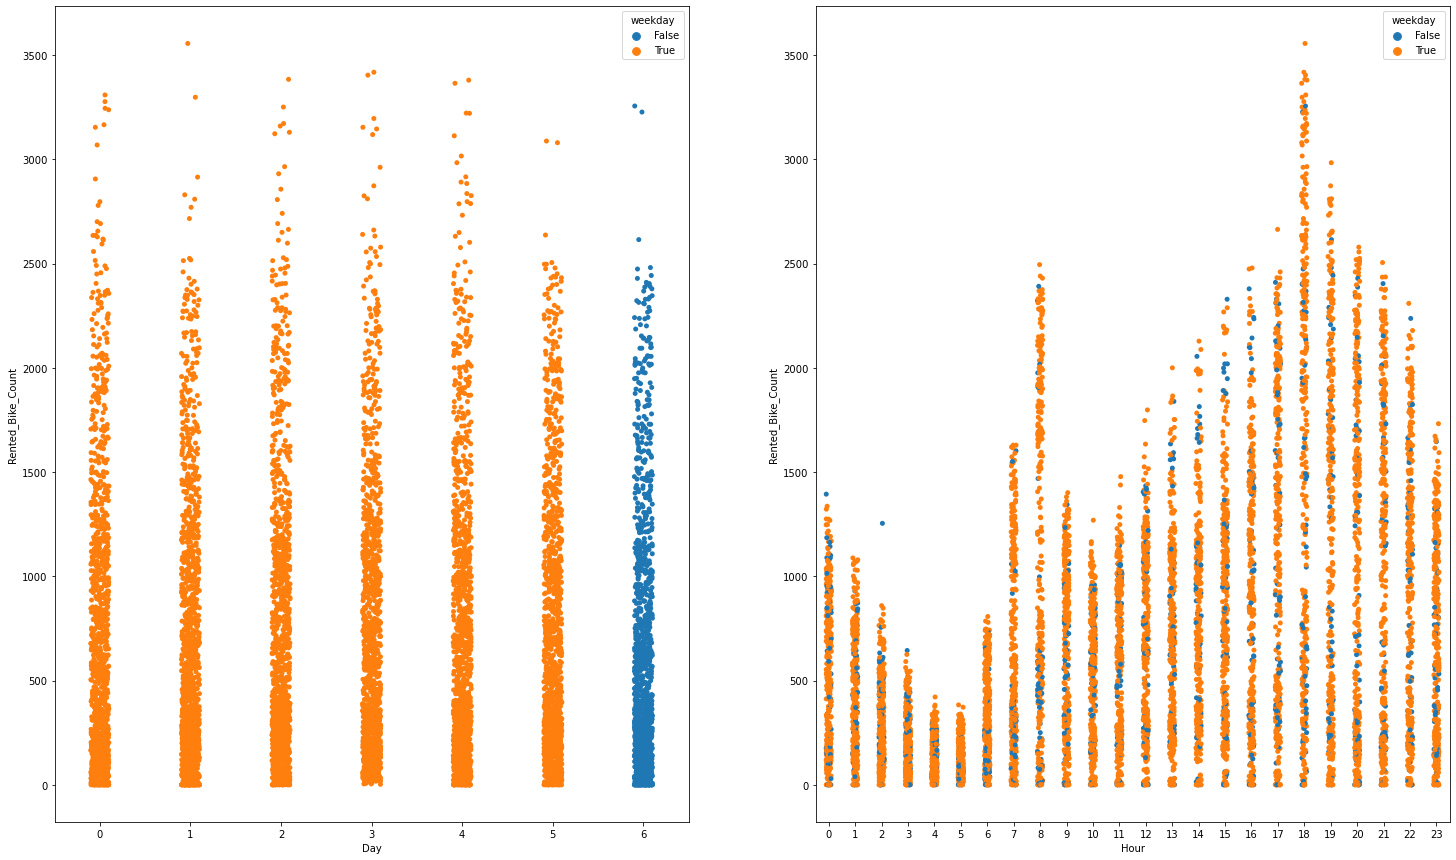

In [26]:
fig, axs = plt.subplots (1, 2, figsize=(25, 15))
sns.stripplot(x='Day',y='Rented_Bike_Count' , hue='weekday', data=df, ax=axs[0]);
sns.stripplot(x='Hour',y='Rented_Bike_Count' , hue='weekday', data=df, ax=axs[1]);

##### Is there an hour the bikes are rented most?
The most bikes rented in hour is 18 wich which is 6 pm

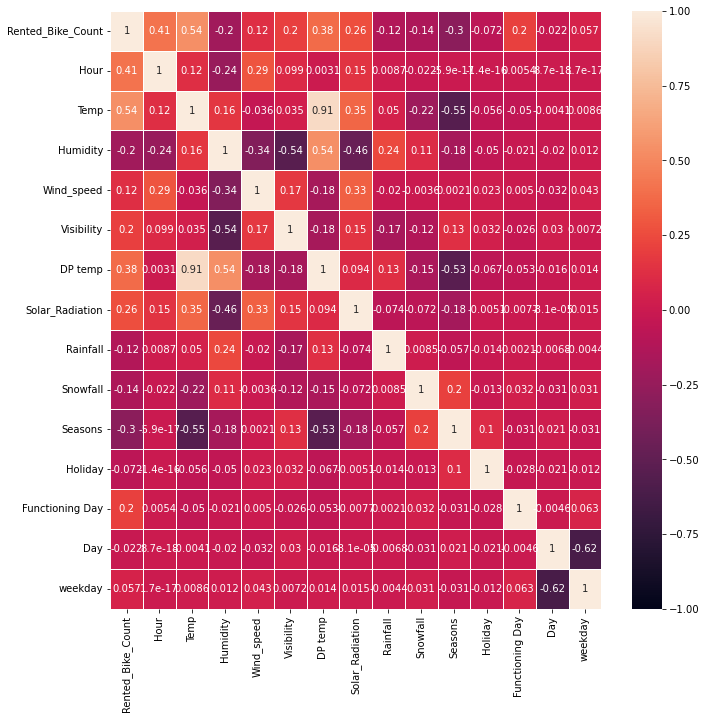

In [27]:
plt.gcf().set_size_inches(11, 11)
sns.heatmap(df.corr(), linewidths=.5, annot=True, vmin=-1, vmax=1);

In [28]:
df = df.drop(['Date'], axis=1)

In [29]:
ls=[df[df.Day==1].Rented_Bike_Count.count(),
    df[df.Day==2].Rented_Bike_Count.count(),
    df[df.Day==3].Rented_Bike_Count.count(),
    df[df.Day==4].Rented_Bike_Count.count(),
    df[df.Day==5].Rented_Bike_Count.count(),
    df[df.Day==6].Rented_Bike_Count.count(),
    df[df.Day==7].Rented_Bike_Count.count()]

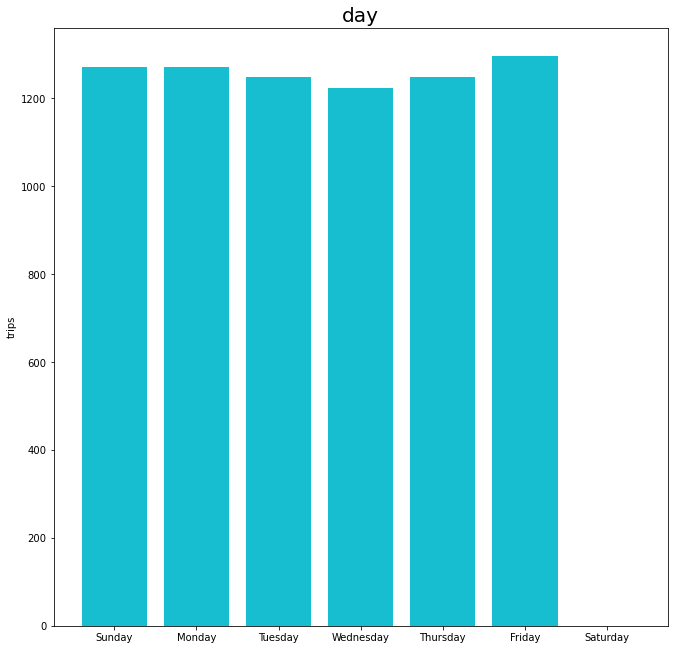

In [30]:
weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.bar([1,2,3,4,5,6,7], ls, tick_label= weekday, color=color)
plt.gcf().set_size_inches(11, 11)
plt.title('day',fontsize=20)
plt.xlabel('');
plt.ylabel('trips');
plt.show()

##### Which day of the week the bikes are rented more than others?
From the plot above you can see that Friday is the maximum and Saturday is the minimum with 0 reantals.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Rented_Bike_Count'), df['Rented_Bike_Count'], test_size = 0.2, random_state=42)
# Show the results of the split
print('Training set has', X_train.shape[0],'samples.')
print('Testing set has', X_test.shape[0],'samples.')

Training set has 7008 samples.
Testing set has 1752 samples.
